In [1]:
# imports for data analysis and plot
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns




# import fuctions for model evaluation and tuning 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, plot_roc_curve




In [2]:
df=pd.read_csv('cardio_train.csv',sep=';')

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df.isnull().values.any()

False

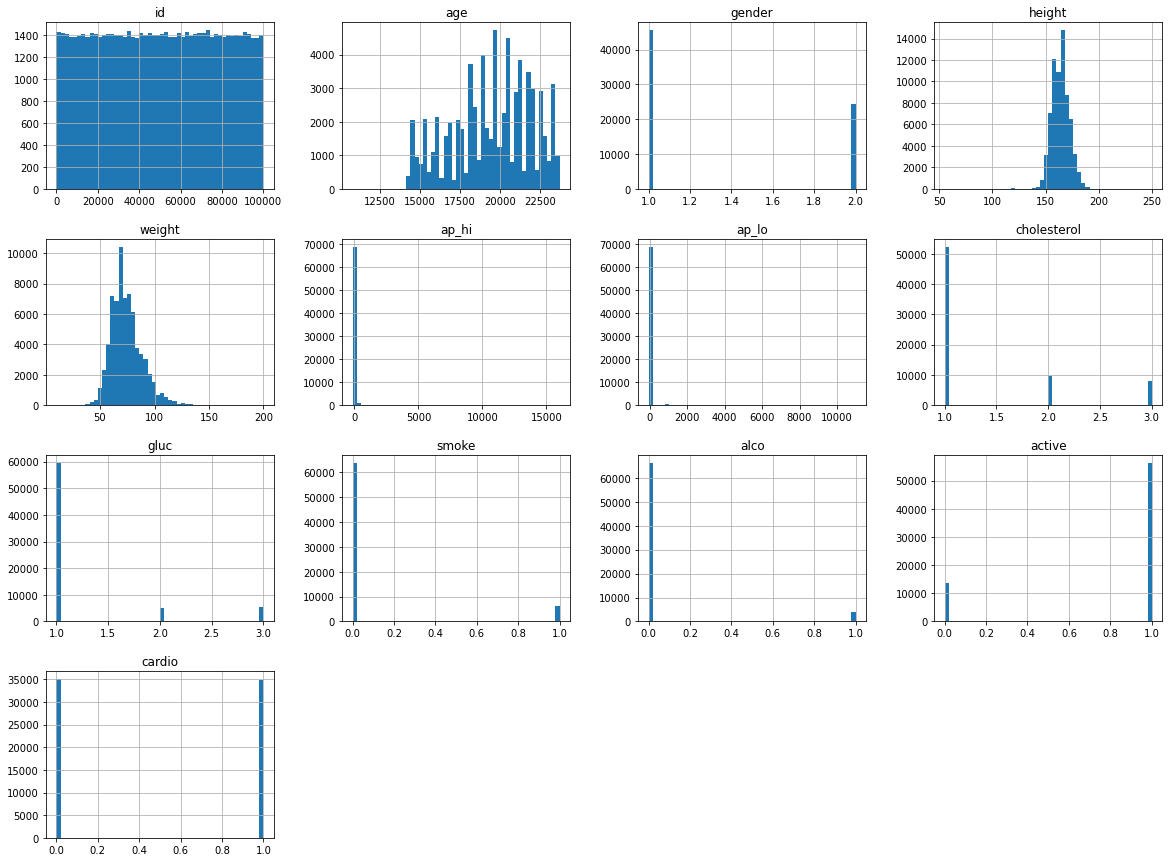

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15));

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


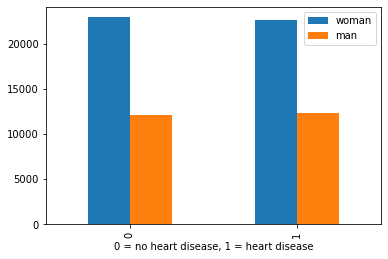

In [8]:
pd.crosstab(df['cardio'], df['gender']).plot(kind = 'bar')
plt.xlabel('0 = no heart disease, 1 = heart disease')
plt.legend(['woman','man'])
plt.show()

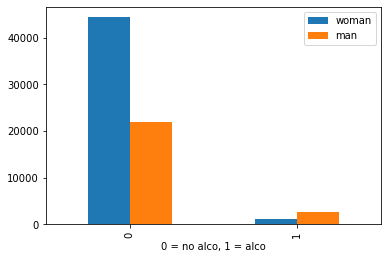

In [9]:
pd.crosstab(df['alco'], df['gender']).plot(kind = 'bar')
plt.xlabel('0 = no alco, 1 = alco')
plt.legend(['woman','man'])
plt.show()

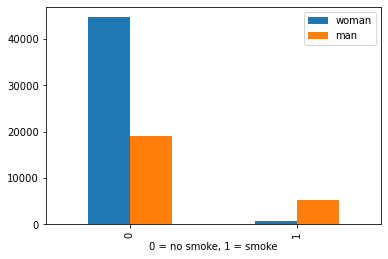

In [10]:
pd.crosstab(df['smoke'], df['gender']).plot(kind = 'bar')
plt.xlabel('0 = no smoke, 1 = smoke')
plt.legend(['woman','man'])
plt.show()

In [11]:
# Creating new Variables

df['bmi'] = (df['weight'] / (((df['height']/100)**2))).round(decimals=2)   # Body mass index
df['age_y'] = (df['age']/365).round(decimals=2)                               # Age in years

# Creating Flags for categories as 0-1

df['bmi_high'] = (df['bmi'] >= 30).astype(int)

In [12]:
del df['age']
del df['id']

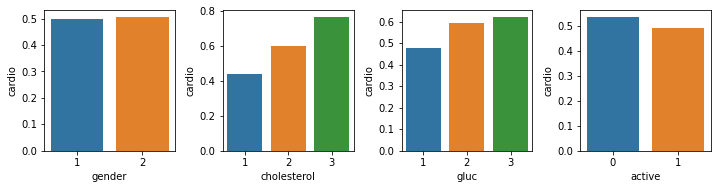

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

In [13]:
Colunas = ('gender', 'cholesterol',	'gluc',	'active')
fig=plt.figure(figsize=(20,20))
j = 1
for i in Colunas :
  ax=fig.add_subplot(8,8,j)
  j = j + 1
  plt.figure(figsize=(2, 2))
  sns.barplot(x=i,y='cardio',data=df,ci=None,ax=ax)
  fig.tight_layout()  
plt.show()

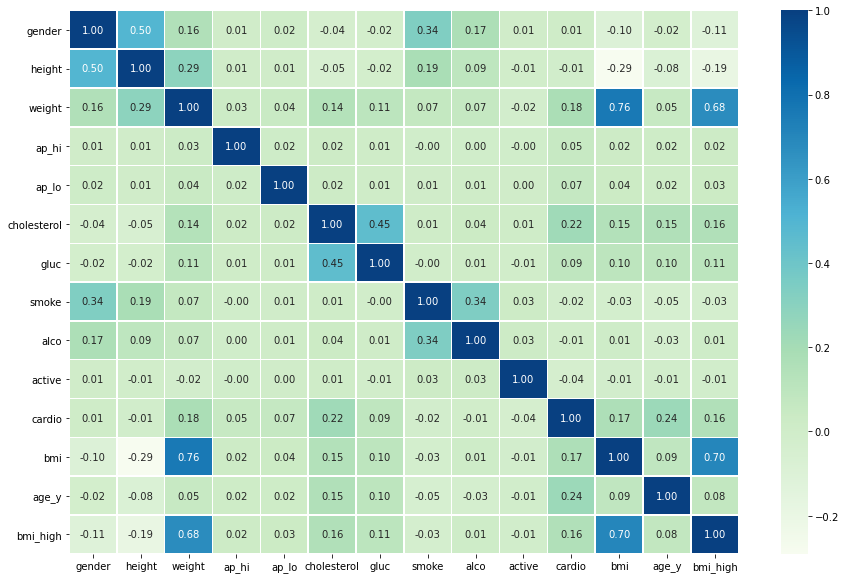

In [14]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(
    corr_matrix, 
    annot = True, 
    linewidths = 0.5,
    fmt = '0.2f', 
    cmap = 'GnBu'
)

<AxesSubplot:xlabel='age_y', ylabel='weight'>

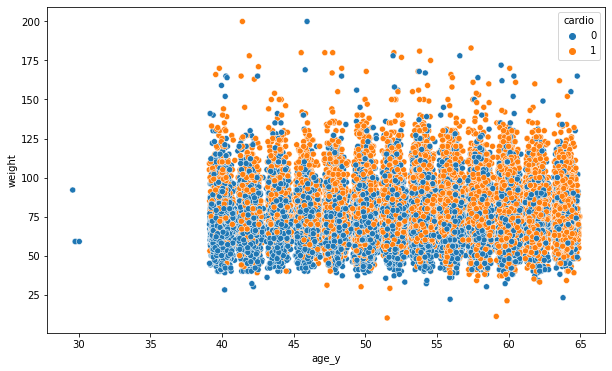

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_y', y='weight', data= df, hue='cardio')

<AxesSubplot:xlabel='weight', ylabel='Count'>

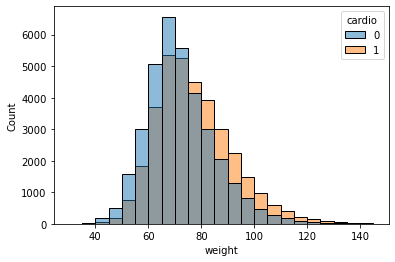

In [16]:
# Visualizing and understanding continuous variables relation with cardio variable

sns.histplot(df, x='weight', bins = range(30,150,5), hue='cardio')

<AxesSubplot:xlabel='age_y', ylabel='Count'>

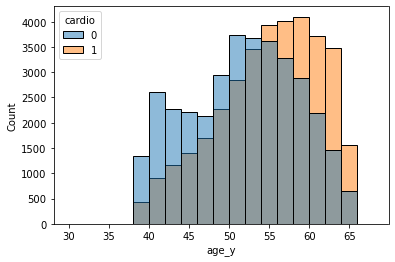

In [17]:
sns.histplot(df, x='age_y', bins = range(30,70,2), hue='cardio')

In [18]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_y,bmi_high
0,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50.39,0
1,1,156,85.0,140,90,3,1,0,0,1,1,34.93,55.42,1
2,1,165,64.0,130,70,3,1,0,0,0,1,23.51,51.66,0
3,2,169,82.0,150,100,1,1,0,0,1,1,28.71,48.28,0
4,1,156,56.0,100,60,1,1,0,0,0,0,23.01,47.87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,26.93,52.71,0
69996,1,158,126.0,140,90,2,2,0,0,1,1,50.47,61.92,1
69997,2,183,105.0,180,90,3,1,0,1,0,1,31.35,52.24,1
69998,1,163,72.0,135,80,1,2,0,0,0,1,27.10,61.45,0


In [19]:
df = df.drop(['bmi_high'],axis=1)
df = df.drop(['age_y'],axis=1)
df = df.drop(['bmi'],axis=1)

In [20]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,156,85.0,140,90,3,1,0,0,1,1
2,1,165,64.0,130,70,3,1,0,0,0,1
3,2,169,82.0,150,100,1,1,0,0,1,1
4,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0
69996,1,158,126.0,140,90,2,2,0,0,1,1
69997,2,183,105.0,180,90,3,1,0,1,0,1
69998,1,163,72.0,135,80,1,2,0,0,0,1


In [21]:
x = df.iloc[:,:-1]

In [22]:
x

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,2,168,62.0,110,80,1,1,0,0,1
1,1,156,85.0,140,90,3,1,0,0,1
2,1,165,64.0,130,70,3,1,0,0,0
3,2,169,82.0,150,100,1,1,0,0,1
4,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1
69996,1,158,126.0,140,90,2,2,0,0,1
69997,2,183,105.0,180,90,3,1,0,1,0
69998,1,163,72.0,135,80,1,2,0,0,0


In [23]:
y = df.iloc[:,10]

In [24]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [25]:
X = df.drop(labels = 'cardio', axis = 1)
y = df['cardio']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30)

In [30]:
x_train, 

(       gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
 32587       1     166    69.0    100     65            1     1      0     0   
 68044       2     175    96.0    110     70            2     1      0     0   
 19770       2     171    93.0    160    100            1     1      0     1   
 34215       1     163    66.0    140     90            1     1      0     0   
 32530       1     175    75.0    110     79            3     3      0     0   
 ...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
 37771       1     165    65.0    110     70            1     1      0     0   
 24039       2     165    50.0    100     60            1     1      0     0   
 6158        1     165    64.0    120     70            3     3      0     0   
 48714       2     169    78.0    120     80            1     1      0     0   
 56750       1     160    60.0    120     80            3     3      0     0   
 
        active  
 32587       1  
 680

In [31]:
x_test, 

(       gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
 24144       2     157    62.0    120     80            1     1      0     0   
 17246       1     158    53.0    110     70            1     1      0     0   
 30589       1     143    66.0    100     70            2     2      0     0   
 62531       2     174    84.0    120     80            1     1      0     0   
 66119       2     172    78.0    150    100            1     1      1     1   
 ...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
 46377       1     160    62.0    180    120            1     1      0     0   
 21490       1     160    78.0    150     90            1     1      0     0   
 57244       2     161    76.0    140     80            2     1      0     1   
 18752       2     188    68.0    110     70            1     1      0     0   
 52828       1     167    73.0    130     80            1     1      0     0   
 
        active  
 24144       1  
 172

In [32]:
y_train, 

(32587    0
 68044    1
 19770    0
 34215    1
 32530    1
         ..
 37771    1
 24039    0
 6158     0
 48714    1
 56750    1
 Name: cardio, Length: 49000, dtype: int64,)

In [33]:
y_test

24144    1
17246    0
30589    1
62531    1
66119    1
        ..
46377    1
21490    1
57244    1
18752    0
52828    0
Name: cardio, Length: 21000, dtype: int64

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
rfc.score(x_test,y_test)

0.6909047619047619

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
dtc.score(x_test,y_test)

0.6466190476190476

In [42]:
from sklearn.svm import SVC

In [43]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [44]:
svm.score(x_test,y_test)

0.717

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/Users/shuvokhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
lr.score(x_test,y_test)

0.7138095238095238

In [48]:
from sklearn.neighbors import KNeighborsClassifier


In [49]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
knc.score(x_test,y_test)

0.6844761904761905

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
knc.score(x_test,y_test)

0.6844761904761905